In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
EXPORT_PLOTS = False
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary,quaterDiff,voteSuccess,Positive,Negative,Neutral
0,2,3,True,2010-06-15,D. Poston,bought two 85 fl oz hand cream neither dispens...,dispensers don't work,31,0.090909,0.328,0.055,0.617
1,5,14,True,2010-01-07,chandra,believe me year try many many different hand c...,Best hand cream ever.,33,0.400000,0.375,0.055,0.570
2,5,0,True,2018-04-18,Maureen G,great hand lotion,Five Stars,0,0.000000,0.880,0.000,0.120
3,5,0,True,2018-04-18,Terry K,best severely dry skin hand,Five Stars,0,0.000000,0.597,0.242,0.161
4,5,0,True,2018-04-17,Patricia Wood,best non oily hand cream ever heals overnight,I always have a backup ready.,0,0.000000,0.552,0.000,0.448
...,...,...,...,...,...,...,...,...,...,...,...,...
3310,1,23,True,2011-06-25,SLC,ubisoft make number excellent flight simulator...,A swing and a miss,27,0.793103,0.347,0.050,0.603
3311,5,0,True,2011-05-29,GZambrano,great graphic fun play first play keyboard bit...,H.A.W.X.2,27,0.000000,0.584,0.088,0.328
3312,1,3,True,2014-11-12,Joseph,game crap wonder game still sale cant play fki...,GAME IS COMPLETE CRAP!,13,0.200000,0.114,0.233,0.653
3313,5,0,True,2014-08-26,marcos,excelent,Five Stars,14,0.000000,0.000,0.000,1.000


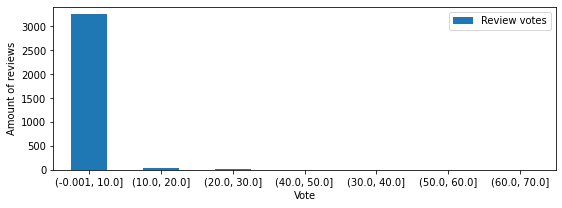

In [3]:
bins = list(range(0, 75, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])
if EXPORT_PLOTS:
    plt.savefig("../../report/img/votes_binned_including_0.svg", bbox_inches="tight")

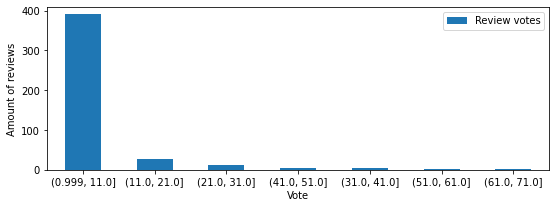

In [4]:
bins = list(range(1, 75, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])
if EXPORT_PLOTS:
    plt.savefig("../../report/img/votes_binned_excluding_0.svg", bbox_inches="tight")

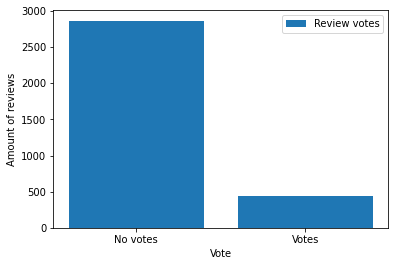

In [5]:
votes = df["vote"].value_counts()
no_votes = votes[0].sum()
has_votes = votes[1:].sum()
plt.bar(["No votes", "Votes"], [no_votes, has_votes])
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])
if EXPORT_PLOTS:
    plt.savefig("../../report/img/no_votes_vs_votes.svg", bbox_inches="tight")

In [6]:
bins = list(range(1, 75, 10))  # [1, 11, 21, 31, 41, 51, 61, 71]


def split_by_ratings(data: pd.DataFrame) -> list[list]:
    split_data = []
    for rating in range(5, 0, -1):
        single_rating_votes = df.loc[df.rating == rating]["vote"]
        binned = single_rating_votes.value_counts(bins=bins)
        split_data.append(binned.to_list())
    return split_data


split_by_ratings(df)

[[194, 11, 5, 2, 2, 2, 1],
 [53, 5, 2, 1, 1, 0, 0],
 [42, 2, 1, 0, 0, 0, 0],
 [25, 2, 1, 1, 0, 0, 0],
 [76, 7, 3, 1, 1, 0, 0]]

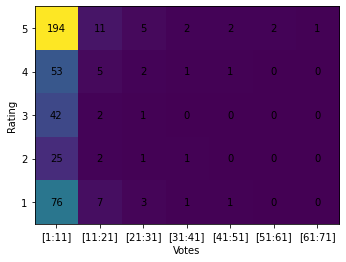

In [7]:
heatmap = np.array(split_by_ratings(df))

bin_labels = [
    "[1:11]",
    "[11:21]",
    "[21:31]",
    "[31:41]",
    "[41:51]",
    "[51:61]",
    "[61:71]",
]
rating_labels = range(5, 0, -1)

fig, ax = plt.subplots()
im = ax.imshow(heatmap)
ax.set_yticks(range(len(rating_labels)), lables="rating")
ax.set_xticks(range(len(bin_labels)), lables="bins")
ax.set_ylabel("Rating")
ax.set_xlabel("Votes")
ax.set_xticklabels(bin_labels)
ax.set_yticklabels(rating_labels)

for i in range(5):
    for j in range(len(bins) - 1):
        text = ax.text(j, i, heatmap[i, j], ha="center", va="center")

if EXPORT_PLOTS:
    plt.savefig("../../report/img/rating_vote_heatmap_excluding_no_votes.svg")